<a href="https://colab.research.google.com/github/riyasingh-10/google-colab/blob/main/ecommerce_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Display first few rows
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head(10)

Dataset loaded successfully!
Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
print('Basic Statistics')
print(df.describe())

print('missing values')
print(df.isnull().sum())

print(df.shape)

Basic Statistics
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  
missing values
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           

In [ ]:
# Check data info
print("Original dataset shape:", df.shape)

# Remove cancelled transactions (InvoiceNo starting with 'C')
df_clean = df[~df['InvoiceNo'].astype(str).str.startswith('C')].copy()
print(f"After removing cancellations: {df_clean.shape}")

# Remove rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])
print(f"After removing missing CustomerID: {df_clean.shape}")

# Remove negative quantities and prices (returns/errors)
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"After removing negative values: {df_clean.shape}")

# Remove missing descriptions
df_clean = df_clean.dropna(subset=['Description'])
print(f"Final cleaned dataset: {df_clean.shape}")

# Create total sales column
df_clean['TotalSales'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Extract date features
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

print("\nCleaned dataset preview:")
df_clean.head()

Original dataset shape: (541909, 8)
After removing cancellations: (532621, 8)
After removing missing CustomerID: (397924, 8)
After removing negative values: (397884, 8)
Final cleaned dataset: (397884, 8)

Cleaned dataset preview:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,8


In [ ]:
# Key business metrics
total_revenue = df_clean['TotalSales'].sum()
total_transactions = df_clean['InvoiceNo'].nunique()
total_customers = df_clean['CustomerID'].nunique()
total_products = df_clean['StockCode'].nunique()
avg_transaction_value = total_revenue / total_transactions


print("BUSINESS METRICS SUMMARY")

print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Total Products: {total_products:,}")
print(f"Average Transaction Value: £{avg_transaction_value:,.2f}")


BUSINESS METRICS SUMMARY
Total Revenue: £8,911,407.90
Total Transactions: 18,532
Total Customers: 4,338
Total Products: 3,665
Average Transaction Value: £480.87


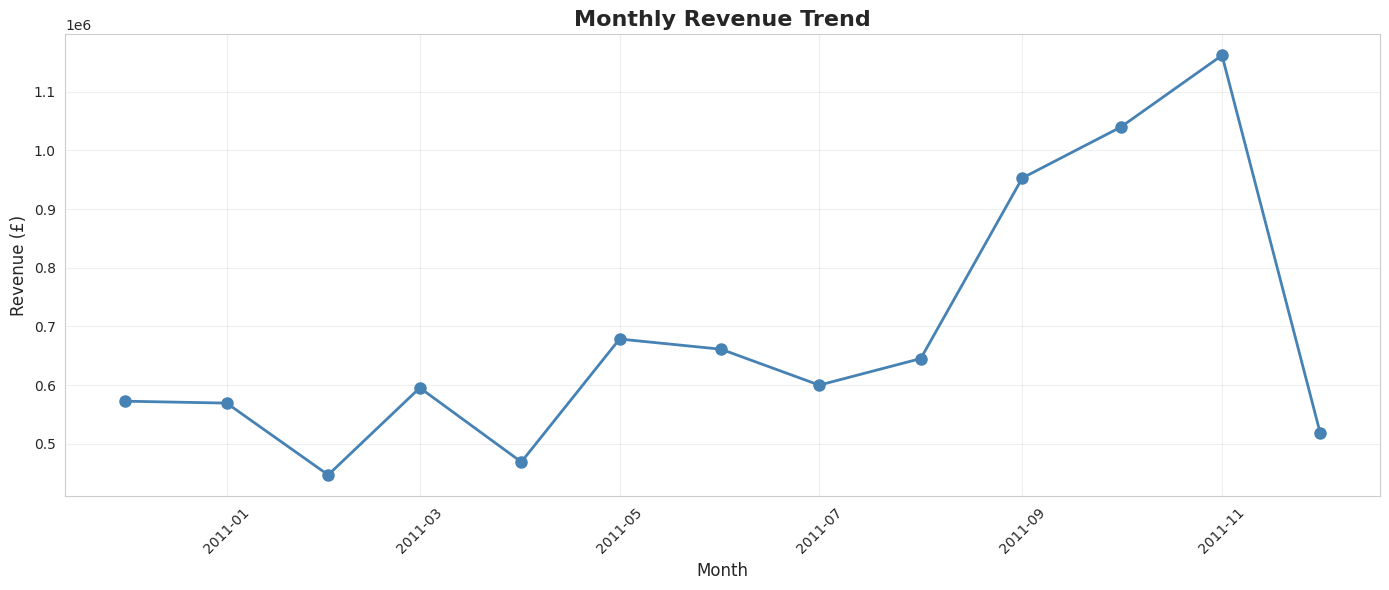

Best Month: 2011-11 with £1,161,817.38
Worst Month: 2011-02 with £447,137.35


In [ ]:
# Monthly revenue trend
monthly_revenue = df_clean.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
monthly_revenue['YearMonth'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(Day=1))

# Plot monthly revenue
plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue['YearMonth'], monthly_revenue['TotalSales'],
         marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find best and worst months
best_month = monthly_revenue.loc[monthly_revenue['TotalSales'].idxmax()]
worst_month = monthly_revenue.loc[monthly_revenue['TotalSales'].idxmin()]

print(f"Best Month: {best_month['Year']}-{best_month['Month']:02d} with £{best_month['TotalSales']:,.2f}")
print(f"Worst Month: {worst_month['Year']}-{worst_month['Month']:02d} with £{worst_month['TotalSales']:,.2f}")

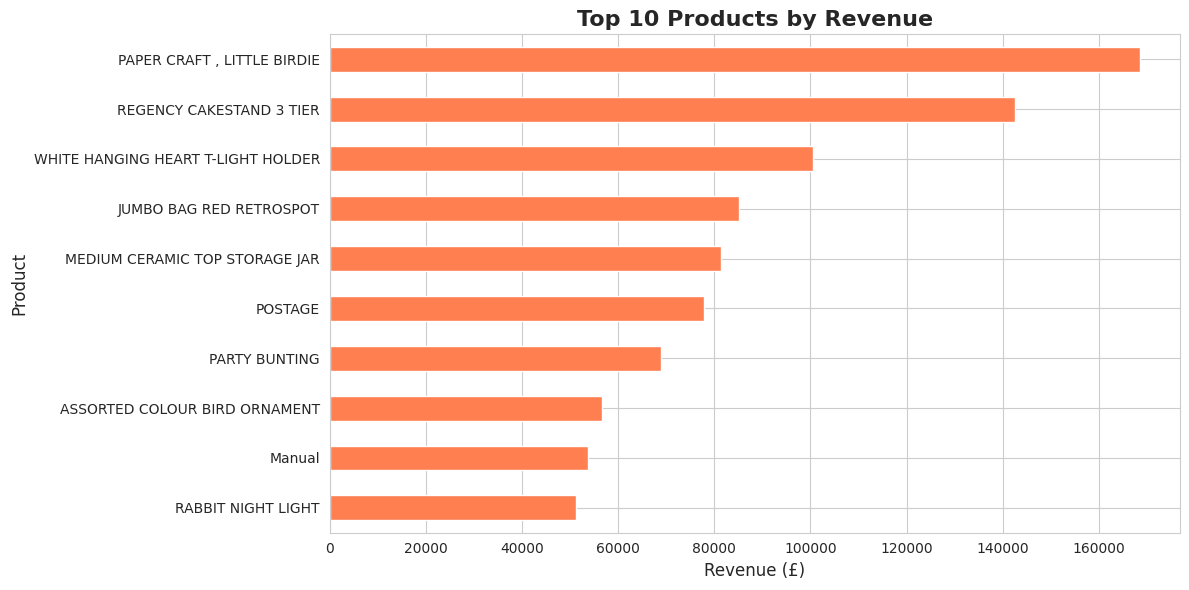


Top 10 Products:
1. PAPER CRAFT , LITTLE BIRDIE: £168,469.60
2. REGENCY CAKESTAND 3 TIER: £142,592.95
3. WHITE HANGING HEART T-LIGHT HOLDER: £100,448.15
4. JUMBO BAG RED RETROSPOT: £85,220.78
5. MEDIUM CERAMIC TOP STORAGE JAR: £81,416.73
6. POSTAGE: £77,803.96
7. PARTY BUNTING: £68,844.33
8. ASSORTED COLOUR BIRD ORNAMENT: £56,580.34
9. Manual: £53,779.93
10. RABBIT NIGHT LIGHT: £51,346.20


In [ ]:
# Top 10 products by revenue
product_revenue = df_clean.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
product_revenue.plot(kind='barh', color='coral')
plt.title('Top 10 Products by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (£)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Products:")
for idx, (product, revenue) in enumerate(product_revenue.items(), 1):
    print(f"{idx}. {product}: £{revenue:,.2f}")

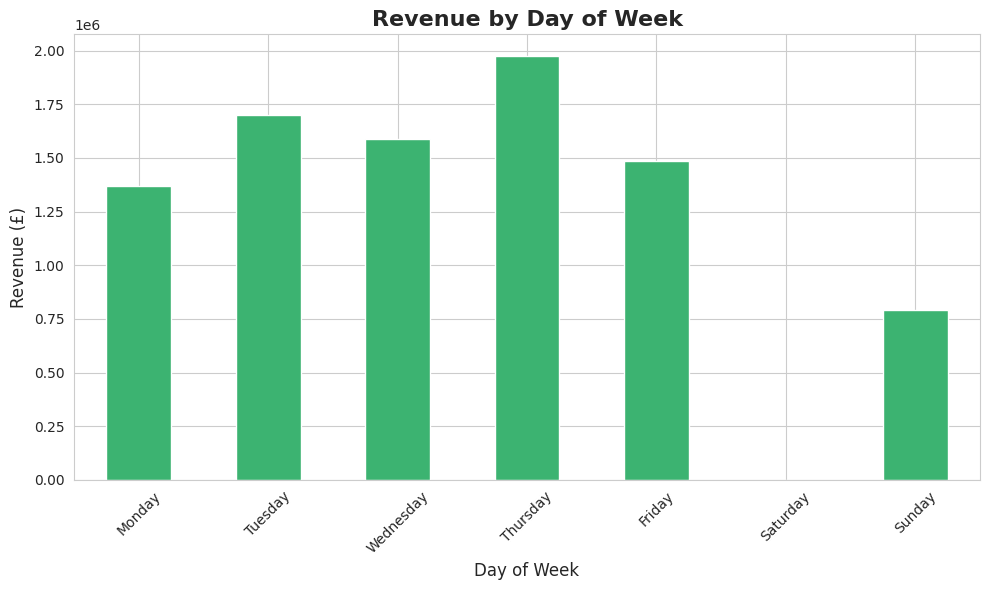


Revenue by Day:
Monday: £1,367,146.41
Tuesday: £1,700,634.63
Wednesday: £1,588,336.17
Thursday: £1,976,859.07
Friday: £1,485,917.40
Saturday: £nan
Sunday: £792,514.22


In [ ]:
# Sales by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = df_clean.groupby('DayOfWeek')['TotalSales'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
day_sales.plot(kind='bar', color='mediumseagreen')
plt.title('Revenue by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nRevenue by Day:")
for day, revenue in day_sales.items():
    print(f"{day}: £{revenue:,.2f}")

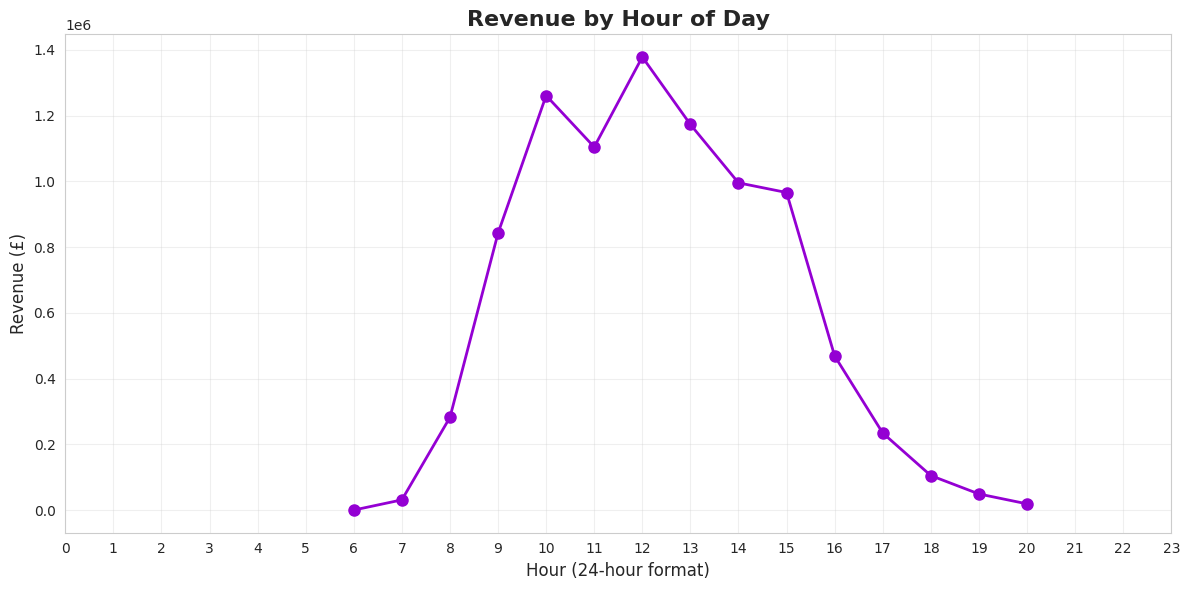


Peak Sales Hour: 12:00 with £1,378,571.48


In [ ]:
# Sales by hour
hourly_sales = df_clean.groupby('Hour')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', linewidth=2, markersize=8, color='darkviolet')
plt.title('Revenue by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour (24-hour format)', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

peak_hour = hourly_sales.idxmax()
print(f"\nPeak Sales Hour: {peak_hour}:00 with £{hourly_sales[peak_hour]:,.2f}")

Top 10 Customers by Total Spending:
1. Customer 14646: £280,206.02 (73.0 transactions, avg £3,838.44)
2. Customer 18102: £259,657.30 (60.0 transactions, avg £4,327.62)
3. Customer 17450: £194,550.79 (46.0 transactions, avg £4,229.36)
4. Customer 16446: £168,472.50 (2.0 transactions, avg £84,236.25)
5. Customer 14911: £143,825.06 (201.0 transactions, avg £715.55)
6. Customer 12415: £124,914.53 (21.0 transactions, avg £5,948.31)
7. Customer 14156: £117,379.63 (55.0 transactions, avg £2,134.18)
8. Customer 17511: £91,062.38 (31.0 transactions, avg £2,937.50)
9. Customer 16029: £81,024.84 (63.0 transactions, avg £1,286.11)
10. Customer 12346: £77,183.60 (1.0 transactions, avg £77,183.60)


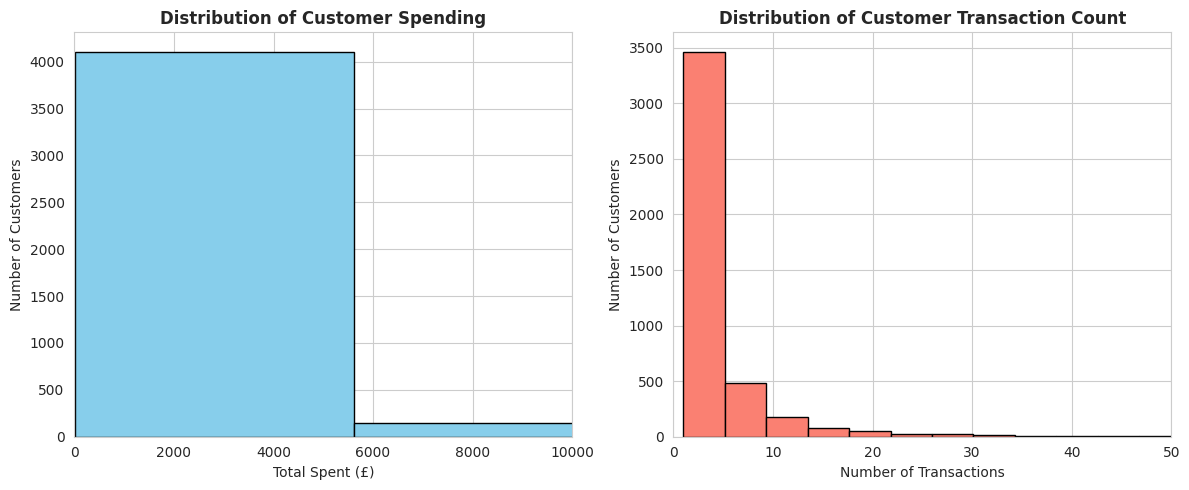


Average customer spending: £2,054.27
Average transactions per customer: 4.3


In [ ]:
# Customer purchasing behavior
customer_stats = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of transactions
    'TotalSales': 'sum'       # Total spent
}).rename(columns={'InvoiceNo': 'NumTransactions', 'TotalSales': 'TotalSpent'})

customer_stats['AvgTransactionValue'] = customer_stats['TotalSpent'] / customer_stats['NumTransactions']

# Top 10 customers by revenue
top_customers = customer_stats.nlargest(10, 'TotalSpent')

print("Top 10 Customers by Total Spending:")
print("="*60)
for idx, (customer_id, row) in enumerate(top_customers.iterrows(), 1):
    print(f"{idx}. Customer {int(customer_id)}: £{row['TotalSpent']:,.2f} "
          f"({row['NumTransactions']} transactions, avg £{row['AvgTransactionValue']:,.2f})")

# Distribution of customer spending
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(customer_stats['TotalSpent'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Spending', fontweight='bold')
plt.xlabel('Total Spent (£)')
plt.ylabel('Number of Customers')
plt.xlim(0, 10000)  # Focus on main distribution

plt.subplot(1, 2, 2)
plt.hist(customer_stats['NumTransactions'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Customer Transaction Count', fontweight='bold')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.xlim(0, 50)  # Focus on main distribution

plt.tight_layout()
plt.show()

print(f"\nAverage customer spending: £{customer_stats['TotalSpent'].mean():,.2f}")
print(f"Average transactions per customer: {customer_stats['NumTransactions'].mean():.1f}")